# How to include biological information into hyperdimensional vectors and is this useful?

In [137]:
include("../src/HDC.jl")
include("../src/math.jl")
include("../src/experimental.jl")
using DataFrames
using CSV
using JLD
using ThreadSafeDicts

## Method 1: Via embeddings (ESM-2)

In [176]:
#Load embeddings from last hidden layer of ESM-2 model (21x1280)
aa_embeddings = DataFrame(CSV.File("../data/amino_acid_embeddings.csv"))
amino_acids_esm = aa_embeddings.protein_ID
aa_emb = Matrix(aa_embeddings[:, 2:end])
# Create HDVs
HDV_mat_bit = zeros(size(aa_emb)[2], 10000)
for i in 1:size(aa_emb)[2]
    HDV_mat_bit[i,:]=bithdv()
end

# Extend embeddings into hyperdimensional space
AA_bit_esm = permutedims(mat_scaler(aa_emb * HDV_mat_bit, 0, 1, 2) .|> round)

10000×21 Matrix{Float64}:
 1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  …  0.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0     1.0  0.0  0.0  1.0  0.0  1.0  1.0
 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0     1.0  0.0  0.0  1.0  1.0  0.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  …  0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  1.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  0.0  0.0  0.0  1.0  1.0
 1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0  1.0  1.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 

## Baseline random HDVs

In [155]:
rand_bit = nested_arrays2mat([bithdv() for i in 1:20], true)

20×10000 BitMatrix:
 0  1  0  1  0  0  0  0  1  0  0  0  0  …  1  0  0  1  1  0  1  0  1  1  1  1
 1  1  0  1  0  1  0  0  0  0  0  0  0     0  0  1  0  1  0  0  1  0  0  0  0
 1  1  0  1  0  1  0  1  0  0  1  0  0     1  1  1  1  1  1  0  0  0  0  0  1
 0  0  1  1  0  0  1  0  0  1  1  1  0     0  0  0  0  1  0  0  0  0  1  0  1
 0  0  1  0  1  1  0  0  0  0  1  1  0     0  1  0  0  1  0  1  1  1  1  1  0
 1  0  0  0  1  0  1  0  0  0  1  1  1  …  1  1  0  0  1  1  1  0  0  1  1  0
 1  1  1  0  1  1  0  0  0  0  0  1  1     1  1  0  0  1  1  0  0  1  0  1  1
 1  0  1  1  1  0  0  0  1  0  0  1  1     1  0  0  1  1  1  1  1  0  0  1  1
 1  1  0  1  1  0  1  1  1  0  0  1  1     1  1  0  1  1  0  1  0  0  1  0  1
 0  0  1  1  0  1  0  1  1  1  1  0  0     1  1  0  0  0  0  1  0  1  0  1  0
 1  1  0  0  1  1  1  1  0  1  0  0  1  …  0  0  1  0  0  1  0  0  1  0  1  1
 1  0  1  0  0  0  1  1  1  0  1  1  0     0  1  1  1  0  1  1  1  0  1  0  0
 1  1  0  0  0  1  1  1  0  0  0  0  1     0

## PCA plots: is the physicochemical and biological information encoded into the HDVs?
### Binary HDVs

In [177]:
using MultivariateStats

PCA_rand_bit = fit(PCA, rand_bit; maxoutdim=2)
proj_rand_bit = projection(PCA_rand_bit)

PCA_ESM_bit = fit(PCA, AA_bit_esm; maxoutdim=2)
proj_ESM_bit = projection(PCA_ESM_bit)

AA_list  = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','X', 'U']
AA_list20 = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
groupsu = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['R', 'H', 'K'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
         groupsu = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['R', 'H', 'K'], "neg-" => ['D', 'E'])

initlist = []
for i in AA_list
    for k in collect(keys(groups))
        if only(i) in groups[k]
            push!(initlist , k)
        end
    end
end

groupsinv = Dict(zip(AA_list, initlist))


Dict{Char, Any} with 22 entries:
  'E' => "neg-"
  'X' => "ambiguous"
  'C' => "non-polar"
  'D' => "neg-"
  'A' => "non-polar"
  'R' => "pos+"
  'G' => "non-polar"
  'F' => "non-polar"
  'N' => "polar"
  'M' => "non-polar"
  'K' => "pos+"
  'P' => "non-polar"
  'Q' => "polar"
  'I' => "non-polar"
  'H' => "pos+"
  'W' => "non-polar"
  'S' => "polar"
  'T' => "polar"
  'U' => "ambiguous"
  ⋮   => ⋮

In [157]:
PCA_rand_bit

PCA(indim = 20, outdim = 2, principalratio = 0.10629820853993445)

Pattern matrix (unstandardized loadings):
──────────────────────────
           PC1         PC2
──────────────────────────
1    0.119929   -0.0682306
2    0.166158   -0.0738217
3    0.111221    0.0530653
4   -0.0245429   0.105696
5   -0.0283049   0.140316
6   -0.106726   -0.0204593
7   -0.115942   -0.115068
8    0.0624019   0.123708
9    0.134676   -0.152804
10   0.0542724   0.0194735
11  -0.178485    0.084368
12   0.11617     0.0474488
13  -0.140148    0.104704
14   0.0526753  -0.110509
15   0.101553    0.18307
16  -0.0471529   0.0590302
17   0.263223    0.158721
18  -0.101059   -0.0222596
19   0.028134   -0.042782
20  -0.0423451   0.264518
──────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
───────────────────────────────────────────────
SS Loadings (Eigenvalues)  0.267964   0.263504
Variance explained         0.0535951  

In [158]:
PCA_ESM_bit

PCA(indim = 10000, outdim = 2, principalratio = 0.22121457420947335)

Pattern matrix (unstandardized loadings):
─────────────────────────────────
                PC1           PC2
─────────────────────────────────
1      -0.0442928     0.224494
2       0.135678      0.187495
3       0.127073     -0.126955
4       0.198096     -0.0757084
5       0.267036     -0.0943949
6      -0.21219      -0.100814
7       0.186676     -0.16206
8      -0.115071     -0.0983219
9      -0.0506308     0.120852
10     -0.0440494     0.175027
11     -0.0397331    -0.174527
12     -0.129598     -0.118625
13     -0.211585      0.168879
14     -0.0603227    -0.105349
15     -0.169617     -0.170645
16     -0.0604033     0.187452
17      0.326023     -0.215632
18      0.0969569     0.0918493
19      0.125298     -0.00878497
20      0.254112     -0.0315658
21     -0.244569      0.0284621
22      0.126548     -0.11989
23     -0.00353324   -0.307801
24      0.00931296   -0.270785
25     -0.215599      0.168487
26   

In [159]:
proj_rand_bit

20×2 Matrix{Float64}:
  0.231678    0.132919
  0.320984    0.14381
  0.214856   -0.103375
 -0.047412   -0.205904
 -0.0546794  -0.273347
 -0.206173    0.0398563
 -0.223977    0.224161
  0.120548   -0.240993
  0.260166    0.297673
  0.104843   -0.0379358
 -0.344798   -0.164356
  0.224417   -0.092434
 -0.270738   -0.203972
  0.101758    0.21528
  0.19618    -0.356635
 -0.0910899  -0.114995
  0.508493   -0.309201
 -0.195226    0.0433634
  0.0543492   0.0833426
 -0.0818022  -0.515301

#### Random binary HDVs

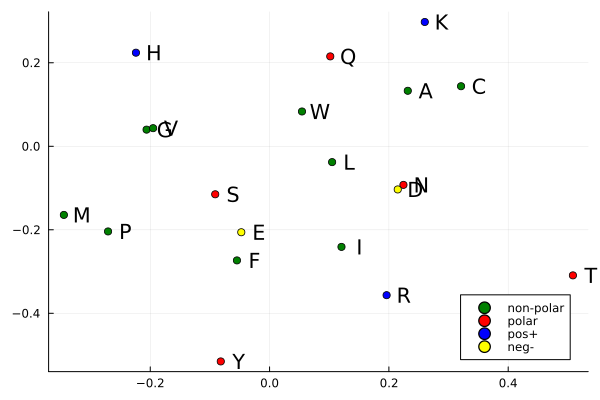

In [175]:
using Plots

key = collect(keys(groupsu))
colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_list20) if y ∈ groupsu[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_list20) if y ∈ groupsu[key[i]] ]

    scatter!(fig, (proj_rand_bit[aa_ind,1], proj_rand_bit[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_rand_bit[aa_ind[f],1] + 0.03, proj_rand_bit[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/random_emb.png")
fig

#### ESM embedded HDVs

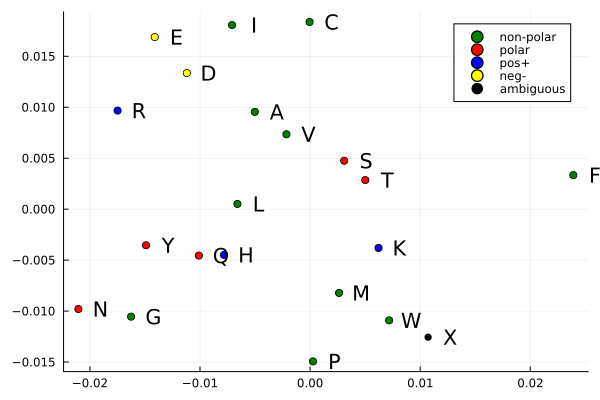

In [178]:
key = collect(keys(groups))
colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(amino_acids_esm) if only(y) ∈ groups[key[i]] ]
    aa = [only(y) for (x,y) in enumerate(amino_acids_esm) if only(y) ∈ groups[key[i]]]

    scatter!(fig, (proj_ESM_bit[aa_ind,1], proj_ESM_bit[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_ESM_bit[aa_ind[f],1] + 0.002, proj_ESM_bit[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/esm_emb.png")
fig

# Human ref proteome embeddings

In [180]:
using JLD
dict4 = load("/home/mfat/Master-Thesis/data/aa_hdv_dict4.jld")["aa_hdv_dict"]
dictk = load("/home/mfat/Master-Thesis/data/aa_hdv_dictk.jld")["aa_hdv_dict"]

Dict{Any, Any} with 22 entries:
  'E' => [0.352386, 0.590637, 0.327424, 0.616646, 0.284433, 0.592283, 0.293631,…
  'X' => [0.208955, 0.283582, 0.492537, 0.402985, 0.656716, 0.298507, 0.701493,…
  'C' => [0.5521, 0.319237, 0.319367, 0.612369, 0.647701, 0.31536, 0.646171, 0.…
  'D' => [0.342342, 0.60075, 0.317189, 0.298431, 0.277138, 0.318302, 0.635705, …
  'A' => [0.355902, 0.589281, 0.329606, 0.609236, 0.630783, 0.334907, 0.620733,…
  'R' => [0.352595, 0.596882, 0.59478, 0.611755, 0.288304, 0.323442, 0.625463, …
  'G' => [0.347911, 0.328428, 0.597221, 0.307066, 0.63524, 0.326429, 0.299178, …
  'Q' => [0.353907, 0.590544, 0.323333, 0.312928, 0.636032, 0.324199, 0.628516,…
  'N' => [0.330291, 0.312455, 0.307171, 0.288853, 0.657438, 0.305346, 0.273399,…
  'P' => [0.36618, 0.583907, 0.583986, 0.590962, 0.297042, 0.572822, 0.608984, …
  'K' => [0.341694, 0.316981, 0.604161, 0.291194, 0.647932, 0.305101, 0.647397,…
  'M' => [0.578948, 0.312314, 0.606429, 0.293712, 0.648803, 0.31177, 0.6376, 

In [183]:
dictr4 = load("/home/mfat/Master-Thesis/data/r_aa_hdv_dict4.jld")["aa_hdv_dict"]
filter!(p -> first(p) ∈ AA_list && first(p) != 'X', dictr4)

Dict{Any, Any} with 20 entries:
  'E' => [0.4531, 0.479786, 0.389355, 0.399431, 0.402716, 0.342496, 0.347158, 0…
  'C' => [0.263394, 0.489559, 0.389943, 0.330151, 0.322847, 0.322328, 0.407359,…
  'D' => [0.255427, 0.511277, 0.327432, 0.379533, 0.402743, 0.338486, 0.325541,…
  'A' => [0.487158, 0.222754, 0.329737, 0.364833, 0.370072, 0.35585, 0.440092, …
  'R' => [0.266778, 0.237781, 0.38338, 0.389564, 0.330062, 0.343547, 0.397686, …
  'G' => [0.490832, 0.541498, 0.398807, 0.37203, 0.387052, 0.362473, 0.437945, …
  'Q' => [0.287649, 0.493464, 0.338453, 0.398166, 0.340673, 0.390684, 0.337421,…
  'N' => [0.470431, 0.245051, 0.325723, 0.341773, 0.309666, 0.326074, 0.388657,…
  'M' => [0.268089, 0.245113, 0.40188, 0.339548, 0.327058, 0.359865, 0.318913, …
  'K' => [0.458053, 0.263272, 0.393447, 0.330283, 0.41577, 0.333624, 0.347242, …
  'F' => [0.254753, 0.220396, 0.32059, 0.365547, 0.394701, 0.32615, 0.312448, 0…
  'P' => [0.479366, 0.508779, 0.350502, 0.330755, 0.375563, 0.379896, 0.43988

In [184]:
dictr50 = load("/home/mfat/Master-Thesis/data/r_aa_hdv_dict50.jld")["aa_hdv_dict"]
filter!(p -> first(p) ∈ AA_list && first(p) != 'X' , dictr50)

ThreadSafeDict{Any, Any} with 20 entries:
  'E' => [0.423269, 0.414013, 0.439757, 0.452135, 0.469007, 0.487282, 0.492417,…
  'C' => [0.413942, 0.490983, 0.485568, 0.434903, 0.446916, 0.435911, 0.517183,…
  'D' => [0.430019, 0.421399, 0.475554, 0.46541, 0.44766, 0.488333, 0.418985, 0…
  'A' => [0.498558, 0.41506, 0.436255, 0.476421, 0.448355, 0.425395, 0.504731, …
  'R' => [0.421437, 0.499193, 0.435602, 0.440663, 0.444684, 0.42344, 0.506291, …
  'G' => [0.502713, 0.410905, 0.428564, 0.435049, 0.441122, 0.505171, 0.515488,…
  'N' => [0.483356, 0.492799, 0.476068, 0.464515, 0.450787, 0.435053, 0.497925,…
  'Q' => [0.503263, 0.405553, 0.428646, 0.48001, 0.436317, 0.499983, 0.404665, …
  'M' => [0.421654, 0.425438, 0.46885, 0.444943, 0.460899, 0.475359, 0.418393, …
  'K' => [0.430245, 0.498945, 0.475031, 0.450624, 0.466597, 0.433371, 0.492487,…
  'F' => [0.494582, 0.426324, 0.444571, 0.44937, 0.459652, 0.435543, 0.496585, …
  'P' => [0.518289, 0.517909, 0.504643, 0.419439, 0.436602, 0.40488

In [185]:
mat4 = collect(values(dict4))
mat4 = nested_arrays2mat(mat4, true)

mat50 = collect(values(dictk))
mat50 = nested_arrays2mat(mat50, true)

matr4 = collect(values(dictr4))
matr4 = nested_arrays2mat(matr4, true)

matr50 = collect(values(dictr50))
matr50 = nested_arrays2mat(matr50, true)


AA_list4 = collect(keys(dict4))
AA_list50 = collect(keys(dictk))
AA_listr4 = collect(keys(dictr4))
AA_listr50= collect(keys(dictr50))


20-element Vector{Any}:
 'E': ASCII/Unicode U+0045 (category Lu: Letter, uppercase)
 'C': ASCII/Unicode U+0043 (category Lu: Letter, uppercase)
 'D': ASCII/Unicode U+0044 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'R': ASCII/Unicode U+0052 (category Lu: Letter, uppercase)
 'G': ASCII/Unicode U+0047 (category Lu: Letter, uppercase)
 'N': ASCII/Unicode U+004E (category Lu: Letter, uppercase)
 'Q': ASCII/Unicode U+0051 (category Lu: Letter, uppercase)
 'M': ASCII/Unicode U+004D (category Lu: Letter, uppercase)
 'K': ASCII/Unicode U+004B (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'P': ASCII/Unicode U+0050 (category Lu: Letter, uppercase)
 'I': ASCII/Unicode U+0049 (category Lu: Letter, uppercase)
 'H': ASCII/Unicode U+0048 (category Lu: Letter, uppercase)
 'W': ASCII/Unicode U+0057 (category Lu: Letter, uppercase)
 'S': ASCII/Unicode U+0053 (category Lu: Letter, uppercase)
 'T': ASCII/Unic

In [186]:
using MultivariateStats
PCA_tr4 = fit(PCA, mat4; maxoutdim=2)

PCA(indim = 22, outdim = 2, principalratio = 0.20874373050449502)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1    0.0340219   -0.0535142
2    0.0686751    0.0400868
3    0.0182164   -0.0323296
4    0.0491864   -0.0204048
5   -0.0120143   -0.0511111
6    0.0388999    0.00346075
7    0.070001    -0.0419041
8    0.0677659    0.00371946
9    0.0625773    0.0519827
10   0.0798455   -0.0330346
11   0.0564447    0.0713107
12   0.0121978    0.0177812
13  -0.00364271   0.0722949
14   0.0137072    0.0787965
15   0.047268    -0.0186065
16   0.0670046   -0.0182353
17   0.0681696   -0.0322752
18   0.0452112   -0.0405153
19   0.00758924  -0.0066712
20   0.0453341    0.0282813
21   0.0216614    0.061358
22  -0.0343776   -0.0142983
────────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
───────────────────────────────────

In [187]:
PCA_tr50 = fit(PCA, mat50; maxoutdim=2)

PCA(indim = 22, outdim = 2, principalratio = 0.20964585932349752)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1    0.0337462   -0.0528073
2    0.042781     0.00227248
3    0.014668    -0.0375495
4    0.0364915   -0.0317672
5   -0.0195139   -0.0643319
6    0.0364856   -0.00106072
7    0.0766356   -0.0307495
8    0.066927    -0.00510404
9    0.0629037    0.0617347
10   0.0836329   -0.0247597
11   0.0587453    0.0716219
12   0.00106795   0.0120319
13  -0.00971746   0.0675031
14   0.00904653   0.0830463
15   0.0557034   -0.0181724
16   0.0733398    7.36789e-5
17   0.0652103   -0.0297473
18   0.0474563   -0.0372422
19  -0.0079552   -0.0081835
20   0.046229     0.0321628
21   0.0111487    0.0593225
22  -0.0441597   -0.0282788
────────────────────────────

Importance of components:
───────────────────────────────────────────────
                                 PC1        PC2
────────────────────────────────

In [188]:
PCA_trr4 = fit(PCA, matr4; maxoutdim=2)

PCA(indim = 20, outdim = 2, principalratio = 0.11363548685930201)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1    0.0265079    0.00463777
2    0.0211761   -0.00515015
3    0.0307136    0.00914681
4   -0.0155032    0.0330986
5    0.0102491    0.0199241
6   -0.0207939    0.0214661
7    0.0386447   -0.019715
8    0.00783731  -0.00178376
9    0.0262262   -0.00129241
10   0.00886195   0.00635034
11   0.00186125   0.00547839
12   0.0464094    0.0471355
13   0.032893    -0.0181905
14  -0.00170534  -0.0067006
15   0.0170922    0.019377
16   0.00119979  -0.0437636
17  -0.0224135   -0.00436362
18  -0.00809646   0.045285
19  -0.0104796    0.00535749
20   0.0240803   -0.0145576
────────────────────────────

Importance of components:
─────────────────────────────────────────────────
                                  PC1         PC2
─────────────────────────────────────────────────
SS Loadings (Eigenvalues)  0.009

In [189]:
PCA_trr50 = fit(PCA, matr50; maxoutdim=2)


PCA(indim = 20, outdim = 2, principalratio = 0.11278668691578676)

Pattern matrix (unstandardized loadings):
────────────────────────────
            PC1          PC2
────────────────────────────
1   -0.0121202    0.036925
2   -0.00941597   0.0201502
3    0.027226     0.00757069
4    0.0252612   -0.00638461
5    0.0133929    0.0124465
6    0.0360488   -0.00565574
7   -0.0242936   -0.00370279
8   -0.00751138   0.0215667
9   -0.0290729   -0.00827115
10   0.0334204   -0.0127619
11   0.00319313   0.0119703
12  -0.0204021   -0.0321211
13  -0.0133915    0.0359411
14   0.00781645   0.0143401
15   0.0202747    0.0244002
16  -0.00210286   0.00305589
17  -0.0140891   -0.00373596
18   0.00448956   0.0524836
19   0.00866668   0.0176415
20  -0.0461213    0.00793734
────────────────────────────

Importance of components:
─────────────────────────────────────────────────
                                  PC1         PC2
─────────────────────────────────────────────────
SS Loadings (Eigenvalues)  0.00

In [190]:
proj_tr4 = projection(PCA_tr4)
proj_tr50 = projection(PCA_tr50)
proj_trr4 = projection(PCA_trr4)
proj_trr50 = projection(PCA_trr50)

20×2 Matrix{Float64}:
  0.126321    0.385295
  0.0981369   0.210258
 -0.28376     0.0789967
 -0.263282   -0.0666205
 -0.139586    0.129874
 -0.375715   -0.059015
  0.253197   -0.038637
  0.0782865   0.225038
  0.303009   -0.0863057
 -0.34832    -0.133164
 -0.03328     0.124904
  0.212639   -0.335169
  0.139571    0.375029
 -0.081466    0.149633
 -0.211311    0.254605
  0.0219168   0.0318869
  0.146842   -0.0389831
 -0.0467919   0.547643
 -0.0903275   0.184081
  0.480694    0.0828225

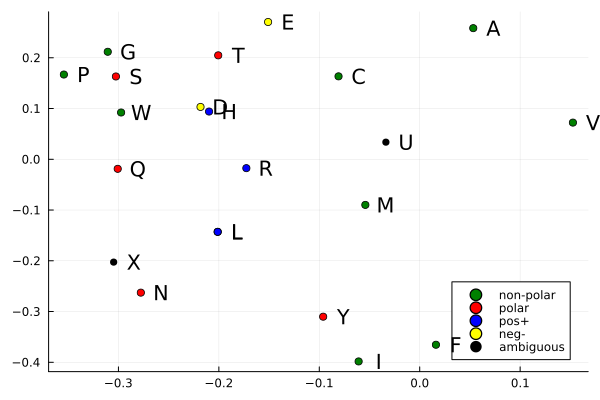

In [192]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_list4) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_list4) if y ∈ groups[key[i]] ]

    scatter!(fig, (proj_tr4[aa_ind,1], proj_tr4[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_tr4[aa_ind[f],1] + 0.02, proj_tr4[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/4tr_emb.png")
fig

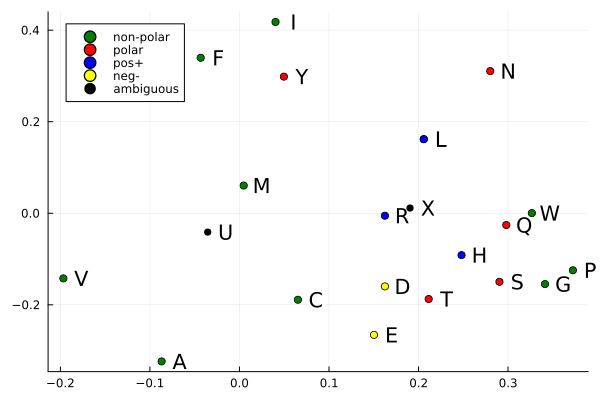

In [193]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_list50) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_list50) if y ∈ groups[key[i]] ]

    scatter!(fig, (proj_tr50[aa_ind,1], proj_tr50[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_tr50[aa_ind[f],1] + 0.02, proj_tr50[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/50tr_emb.png")
fig

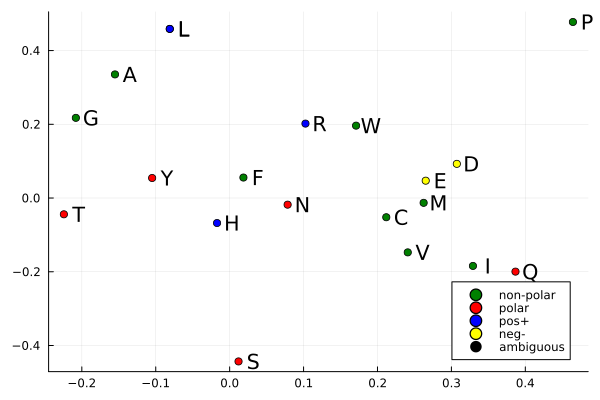

In [195]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_listr4) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_listr4) if y ∈ groups[key[i]] ]

    scatter!(fig, (proj_trr4[aa_ind,1], proj_trr4[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_trr4[aa_ind[f],1] + 0.02, proj_trr4[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/r4tr_emb.png")
fig

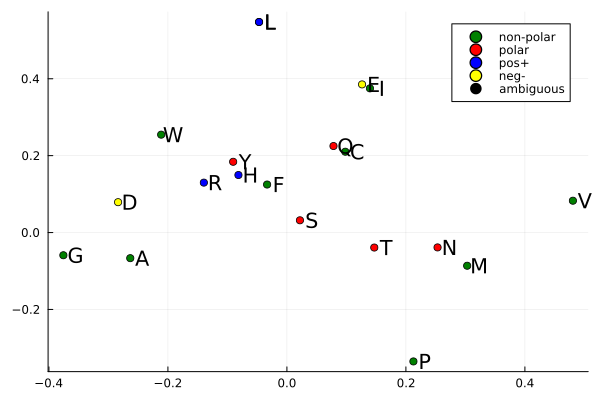

In [196]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_listr50) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_listr50) if y ∈ groups[key[i]] ]

    scatter!(fig, (proj_trr50[aa_ind,1], proj_trr50[aa_ind,2]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((proj_trr50[aa_ind[f],1] + 0.02, proj_trr50[aa_ind[f],2], aa[f]))
    end
end
savefig("../thesis/Fig/r50tr_emb.png")
fig

## UMAP

In [200]:
using UMAP

In [201]:
umap4 = umap(permutedims(mat4), 2)

2×22 Matrix{Float64}:
 11.9262   12.4732   11.3284   12.4385   …  12.6557   13.503    12.5604
  7.48951   5.97061   6.41285   7.73986      5.05981   5.95497   6.78392

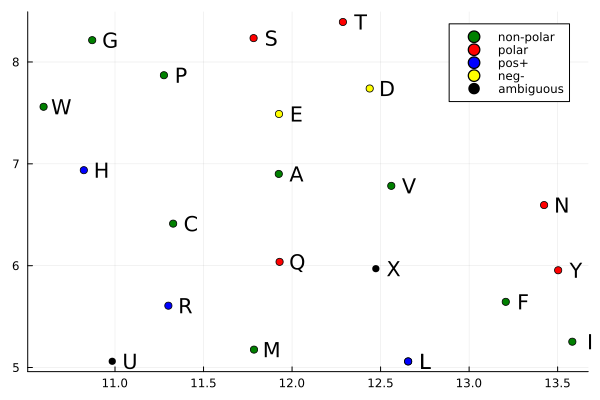

In [206]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_list4) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_list4) if y ∈ groups[key[i]] ]

    scatter!(fig, (umap4[1, aa_ind], umap4[2, aa_ind]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((umap4[1, aa_ind[f]] + 0.1, umap4[2, aa_ind[f]], aa[f]))
    end
end
savefig("../thesis/Fig/u4tr_emb.png")
fig

In [207]:
umap50 = umap(permutedims(mat50), 2)

2×22 Matrix{Float64}:
 -9.1011   -8.51198  -8.35103  -9.19809  …  -9.22409  -7.47545  -7.31866
 -4.75683  -3.40868  -4.7883   -4.16539     -2.52878  -2.66751  -5.24626

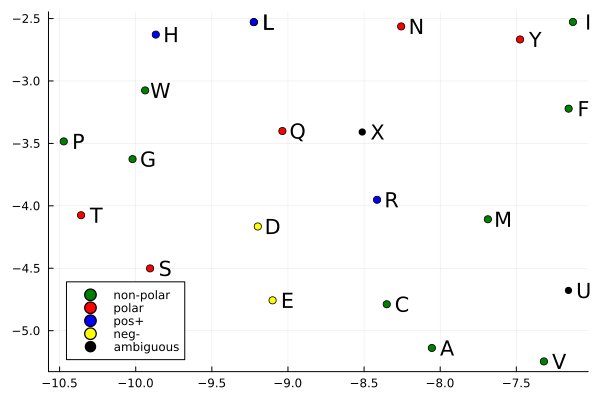

In [208]:
using Plots

colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_list50) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_list50) if y ∈ groups[key[i]] ]

    scatter!(fig, (umap50[1, aa_ind], umap50[2, aa_ind]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((umap50[1, aa_ind[f]] + 0.1, umap50[2, aa_ind[f]], aa[f]))
    end
end
savefig("../thesis/Fig/u50tr_emb.png")
fig

In [209]:
umapr4 = umap(permutedims(matr4), 2)

2×20 Matrix{Float64}:
 3.63852   4.12101  3.4381    4.94769  …   4.29897    5.11622   2.74648
 0.204985  1.78348  0.772931  1.20026     -0.704446  -0.726411  0.669462

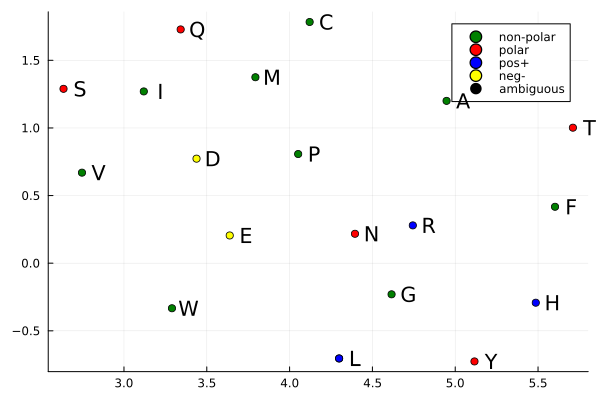

In [210]:
colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_listr4) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_listr4) if y ∈ groups[key[i]] ]

    scatter!(fig, (umapr4[1, aa_ind], umapr4[2, aa_ind]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((umapr4[1, aa_ind[f]] + 0.1, umapr4[2, aa_ind[f]], aa[f]))
    end
end
savefig("../thesis/Fig/ur4tr_emb.png")
fig

In [211]:
umapr50 = umap(permutedims(matr50), 2)

2×20 Matrix{Float64}:
 -0.720689  -1.45529  0.330989  0.336337  …  -0.437657  -0.944311  -1.12076
  6.11394    5.41476  4.45247   5.52709       5.09074    4.33121    6.64665

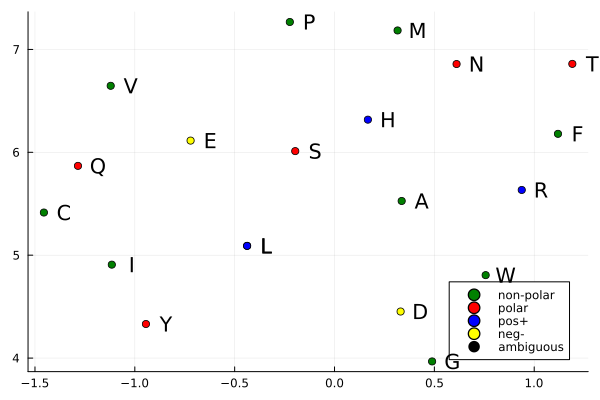

In [212]:
colors = [:green, :red, :blue, :yellow, :black]
fig = Plots.plot()
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'], "ambiguous" => ['U', 'X'])
key = collect(keys(groups))

for i in 1:length(key)

    aa_ind = [x for (x,y) in enumerate(AA_listr50) if y ∈ groups[key[i]] ]
    aa = [y for (x,y) in enumerate(AA_listr50) if y ∈ groups[key[i]] ]

    scatter!(fig, (umapr50[1, aa_ind], umapr50[2, aa_ind]), label=key[i], mc = colors[i])

    for f in 1:length(aa_ind)
        annotate!((umapr50[1, aa_ind[f]] + 0.1, umapr50[2, aa_ind[f]], aa[f]))
    end
end
savefig("../thesis/Fig/ur50tr_emb.png")
fig